<a href="https://colab.research.google.com/github/JaimeWilson/Computaci-n-Grafica/blob/main/RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pontifícia Universidade Católica do Rio de Janeiro
## Inteligência Computacional Aplicada 

Jaime Andrés Castañeda Barbosa

Redes Neurais




Notebook para Redes Neurais.

Pacotes importantes para a execução dos scripts

In [14]:
#Import básico
import numpy as np, pandas as pd 
import json
import matplotlib.pyplot as plt 
import seaborn as sns 

#Para o modelo de Redes Neurais
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Camada Fully Connected
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

#Para avaliação dos resultados e pré-processamento.
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

#Para a avaliação dos datasets
from tensorflow.keras.datasets import mnist
from sklearn.datasets import load_iris


#Descomentar caso queira utilizar no Google Colab
#from google.colab import drive 
#drive.mount('/content/drive')

Para as aulas práticas, utilizamos o framework Keras para a criação de modelos de Redes Neurais. A documentação sobre qualquer função do Keras está presente em https://www.tensorflow.org/api_docs/python/tf/keras/

Uma das grandes vantagens do Keras é a facilidade de construção de um modelo de Redes Neurais (ou até de Deep Learning). No trecho abaixo, precisamos de apenas 3 linhas para declarar a arquitetura do nosso modelo.

Para isso, devemos fazer o seguinte:

$\bullet$ Declarar o nosso modelo como Sequential (i.e. o modelo é um empilhamento de camadas, como é o caso da MLP).

$\bullet$ Adicionar camadas usando o método add. Neste curso, <b> sempre </b> adicionaremos camadas Dense (que conhecemos como camadas totalmente conectadas, ou *Fully Connected*).

A camada Dense possui alguns atributos que precisam ser declarados. O argumento obrigatório é o número de processadores na camada. Para a primeira camada que adicionamos, devemos declarar a dimensão do vetor de entrada (input_dim). 

A camada Dense também possibilita a escolha da função de ativação da camada, como 'sigmoid' ou 'relu'. 

In [21]:
model = Sequential()

In [22]:
model.add(Dense(6, input_dim = 4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [25]:
optimizer = SGD(learning_rate=0.05, momentum=0.0)
model.compile(optimizer=optimizer, loss='categorcial_crossentropy', metrics='accuracy')

In [ ]:
#Criação do modelo MLP.
#Neste caso, estamos criando um modelo com 6 neurônios na camada escondida e 3 neurônios na camada de saída. 
#Além disso, o vetor de entrada é igual a 4.
model = Sequential()
model.add(Dense(6, input_dim=4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

Também precisamos declarar qual o algoritmo que será utilizado para o aprendizado. Neste caso, utilizaremos o Stochastic Gradient Descent, já visto nas aulas teóricas. Podemos alterar alguns hiperparâmetros, como a taxa de aprendizado (learning_rate) ou o termo de momento (momentum).

Após instanciar o otimizador, devemos compilar o modelo, definindo também a função de perda (que depende se o problema é de classificação binária, multiclass ou regressão) e a métrica para avaliação do resultado

In [ ]:
optimizer = SGD(learning_rate=0.05, momentum=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = 'accuracy')

Para facilitar a execução dos códigos, está disponível uma classe que realiza três tarefas importantes para as nossas aulas práticas: criação do modelo, treinamento e avaliação.

In [ ]:
class NeuralNetwork():
  '''
  Objeto criado para facilitar o desenvolvimento dos scripts das aulas práticas.
  Opção alternativa à criação externa fdo modelo. Basicamente serve como um 
  'agregador'  de trechos comuns para a criação do modelo. Por exemplo, ao invés
  de gastar n+1 linhas para a criação de um modelo com n camadas, podemos criar 
  o mesmo modelo com apenas uma linha.
  
  Parâmetros de entrada: 
  - hidden_neurons: Lista com a quantidade de neurônios na camada escondida. 
  - hidden_activation: Função de ativação para cada camada escondida. Aceita 
  como parâmetro string ou lista. Caso o parâmetro receba string, então a mesma
  função de ativação é utilizada para todas as camadas escondidas. Caso seja uma 
  lista, cada camada terá sua propria função de ativação definida pela lista.
  - output_activation: Função de ativação para a camada de saída.
  - lr: Taxa de aprendizado
  - n_input: Tamanho do vetor de entrada.
  - n_output: Saída do modelo.
  '''
  def __init__(self,hidden_neurons = [4], hidden_activation = 'relu', output_activation='softmax', lr = 0.05, n_input = 1, n_output = 1):
    # create model

    if type(hidden_activation) is str:
      ha = [hidden_activation] * len(hidden_neurons)
    else:
      assert len(hidden_neurons) == len(hidden_activation), 'Length mismatch'
      ha = hidden_activation 

    self.model = Sequential()
    self.model.add(Dense(hidden_neurons[0], input_dim=n_input, activation=ha[0]))
    for i in range(1,len(hidden_neurons)):
      self.model.add(Dense(hidden_neurons[i], activation=ha[1]))
          
    self.model.add(Dense(n_output, activation=output_activation))
    # Compile model

    self.opt = SGD(learning_rate=lr)
    
      
  def train(self, X, y, epochs=10, verbose = 0, loss='binary_crossentropy', enable_ES = False, patience = 5, val_split = 0.1):
    '''
    Treinamento do modelo. 
    Parâmetros de entrada:
    X: Base de dados para o treinamento do modelo
    y: Saída do modelo.
    epochs: Épocas de treinamento para o modelo.
    verbose: Depuraçao do treinamento. 0 - Sem print na tela, 1 - Print de 
    monitoramento.
    loss: função de perda para o modelo. 
    enable_ES: boolean para ativação de Early Stopping.
    patience: Termo de paciência do ES. Utilizável apenas se enable_ES = True.

    Saída:
    history: Resultados da fase de treinamento do modelo, para avaliação e 
    visualização.
    '''

  
    self.model.compile(loss=loss, optimizer=self.opt, metrics=['accuracy'])
    
    if enable_ES:
      callback = EarlyStopping(monitor='val_loss', patience=patience)
      history = self.model.fit(x=X,y=y,epochs=epochs, verbose=verbose, callbacks=[callback], validation_split = val_split)
    else:
      history = self.model.fit(x=X,y=y,epochs=epochs, verbose=verbose, validation_split = val_split)

    return history

  def predict(self, X, y, target_names = None):
    '''
    Previsão do modelo. Gera os resultados obtidos e computa algumas métricas 
    de avaliação. 
    Parâmetros de entrada:
    X: Entrada do modelo.
    y: Classe de saída.
    target_names: Nome das classes (se preciso)
    '''

    #Previsão do modelo
    raw_Y_pred = self.model.predict(X)


    #Como o modelo gera uma probabilidade, devemos torná-los em classes, de fato.
    #Aqui, precisamos entender se é um problema multi-class ou binário.

    #Caso multi-class, utilizaremos o argmax
    if raw_Y_pred.shape[1] > 1:
      y_pred = np.argmax(raw_Y_pred, axis=1)
      y = np.argmax(y, axis=1)

    #Caso binário, veremos apenas se probabilidade > 0.5
    else:
      y_pred = np.where(raw_Y_pred > 0.5, 1, 0)
    
    
    #Criando matriz de confusão.
    cm = confusion_matrix(y, y_pred)


    #Classification Report. Contém várias informações de métricas de avaliação.
    print('Classification Report')
    if target_names is None:
      print(classification_report(y, y_pred))

      #Plot da matriz de confusão
      cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      df_cm = pd.DataFrame(cmn, range(raw_Y_pred.shape[1]), range(raw_Y_pred.shape[1]))
      fig, ax = plt.subplots(figsize=(10,10))
      sns.heatmap(df_cm, annot=True, ax = ax) # annot_kws={"size": 16}

    else:

      print(classification_report(y, y_pred, target_names=  target_names))


      #Plot da matriz de confusão
      cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      df_cm = pd.DataFrame(cmn, index= target_names, columns= target_names)
      fig, ax = plt.subplots(figsize=(10,10))

      sns.heatmap(df_cm, annot=True, ax = ax)

  


## Carregando dados Iris

## Exemplo:

Dataset Iris

$\bullet$ 150 exemplos

$\bullet$ 5 atributos:

$\rightarrow$ sepallength; 

$\rightarrow$ sepalwidth; 

$\rightarrow$ petallength; 

$\rightarrow$ petawidth; 

$\rightarrow$ class;

$\bullet$ Classificação: 

$\rightarrow$ Iris-setosa; 

$\rightarrow$ Iris-versicolor; 

$\rightarrow$ Iris-virginica

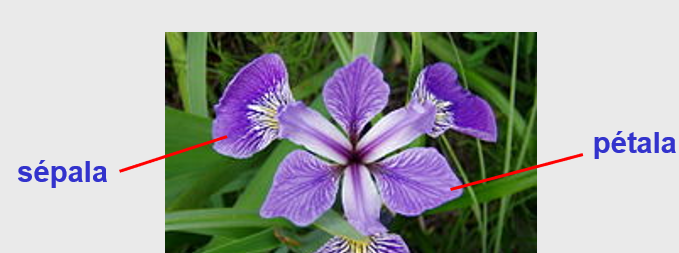

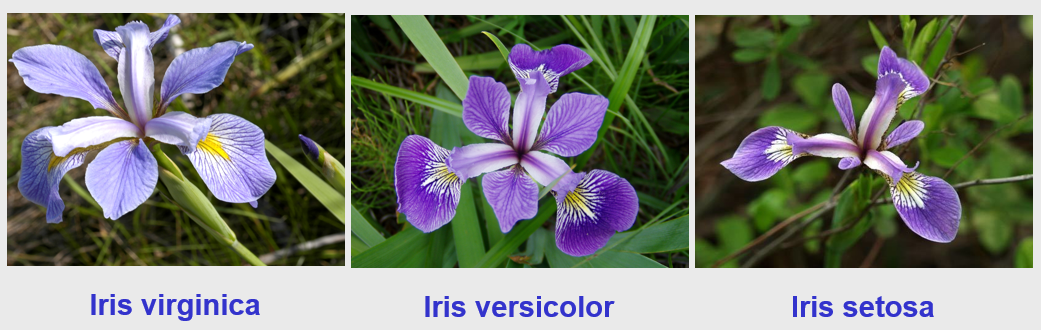

In [ ]:
data = load_iris()

In [ ]:
X = data.data
y = data.target

y = y.reshape(-1,1)

target_names = data.target_names

y_encoded = to_categorical(y)

Apenas para uma melhor compreensão do problema, iremos fazer uma visualização da distribuição dos dados em pares (usando o Seaborn pairplot)

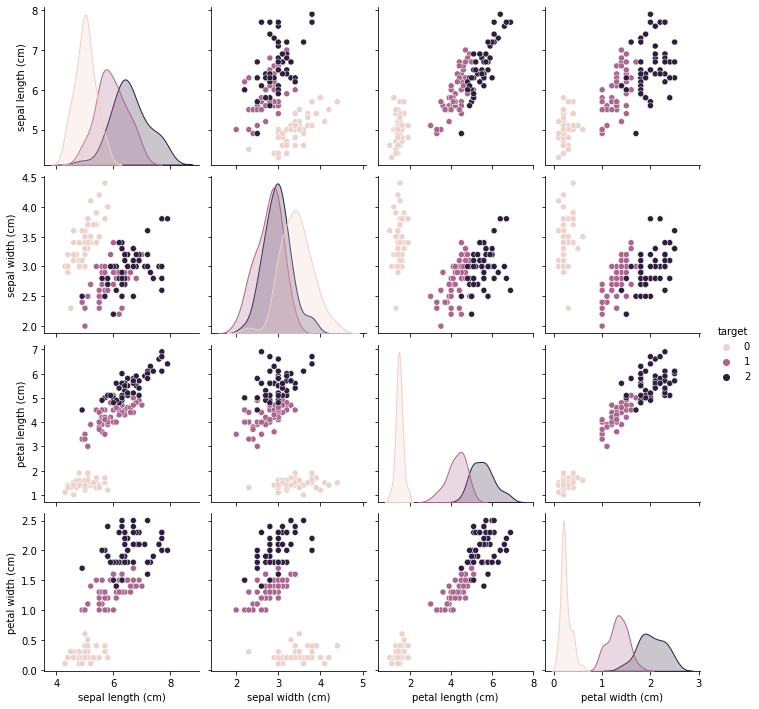

In [ ]:
columns = data.feature_names
columns.append('target')

df = pd.DataFrame(np.concatenate((X,y),axis=1),columns=columns)
df['target'] = df['target'].astype('int')

sns.pairplot(df,hue='target')

Devemos fazer a divisão dos dados entre treinamento e teste. Para isso, usaremos uma função do scikit-learn, chamado train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

Normalização dos dados. Repare que os parâmetros de normalização, tanto para os dados de treinamento quanto para o teste, são extraídos do conjunto de treinamento. Portanto, é importante primeiro fazer a divisão da base de dados para depois implementar a normalização.

In [ ]:
#Normalização para o treinamento
X_std = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))

#Normalização para o teste
X_test_std = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))

In [ ]:
#Criação e treinamento da rede MLP
epochs = 100
patience = 10
NN = NeuralNetwork(hidden_neurons = [20], n_input=4, n_output=3, lr=0.15)
history = NN.train(X_std, y_train, verbose=1, loss='categorical_crossentropy', epochs=epochs, patience = patience, enable_ES = True)

Epoch 1/100
4/4 [==============================] - 1s 84ms/step - loss: 1.0043 - accuracy: 0.3519 - val_loss: 0.9812 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.9440 - accuracy: 0.6667 - val_loss: 0.9494 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9020 - accuracy: 0.6944 - val_loss: 0.9214 - val_accuracy: 0.5833
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8522 - accuracy: 0.8241 - val_loss: 0.8998 - val_accuracy: 0.5833
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8049 - accuracy: 0.8241 - val_loss: 0.8625 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.7626 - accuracy: 0.8148 - val_loss: 0.8355 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7222 - accuracy: 0.8704 - val_loss: 0.8020 - val_accuracy: 0.5000
Epoch 8/100
4/4 [===

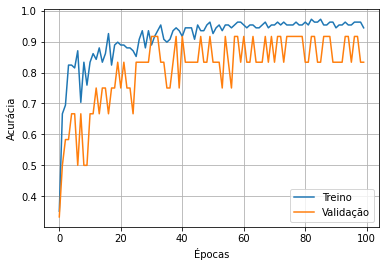

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Treino','Validação'])
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.grid()


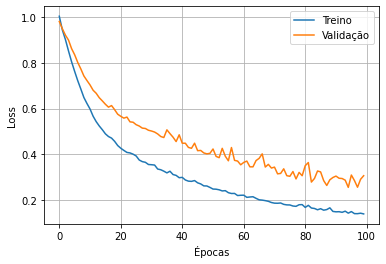

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Treino','Validação'])
plt.grid()
plt.xlabel('Épocas')
plt.ylabel('Loss')

if len(history.history['loss']) < epochs:
  ES = len(history.history['loss']) - patience
  plt.plot(ES*np.ones(100), np.linspace(0,1.2,num=100), '--r')

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



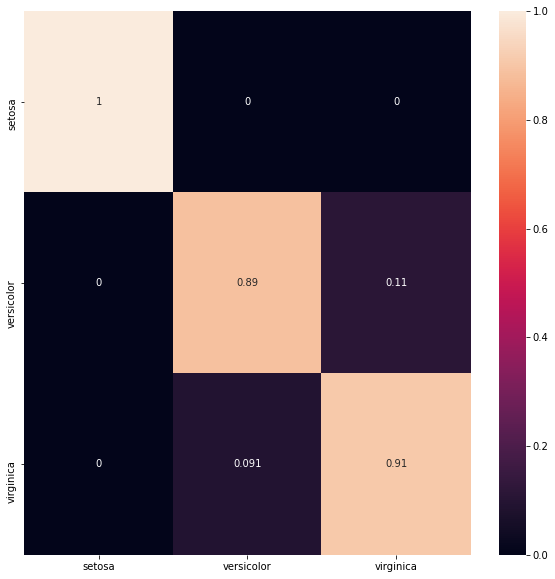

In [ ]:
#Previsão
NN.predict(X_test_std,y_test,target_names=target_names)

## Carregando dados MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

flatten_x_train = x_train.reshape(-1,28*28)
flatten_x_test = x_test.reshape(-1,28*28)

norm_x_train = flatten_x_train/255.0
norm_x_test = flatten_x_test/255.0

In [ ]:
flatten_x_train[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
norm_x_train.shape

(60000, 784)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Yt = encoder.transform(y_train)

encoded_Ytst = encoder.transform(y_test)

encoded_y_train = to_categorical(encoded_Yt)
encoded_y_test = to_categorical(encoded_Ytst)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
n_input = flatten_x_train.shape[1]
n_output = encoded_y_train.shape[1]

In [ ]:
#Criando o modelo 


NN = NeuralNetwork(n_input=n_input, n_output=n_output)
NN.train(norm_x_train, encoded_y_train)

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       980
           1       0.90      0.97      0.93      1135
           2       0.70      0.77      0.73      1032
           3       0.57      0.63      0.60      1010
           4       0.77      0.84      0.80       982
           5       0.51      0.30      0.38       892
           6       0.89      0.93      0.91       958
           7       0.73      0.85      0.78      1028
           8       0.57      0.38      0.45       974
           9       0.70      0.59      0.64      1009

    accuracy                           0.72     10000
   macro avg       0.71      0.72      0.70     10000
weighted avg       0.71      0.72      0.71     10000



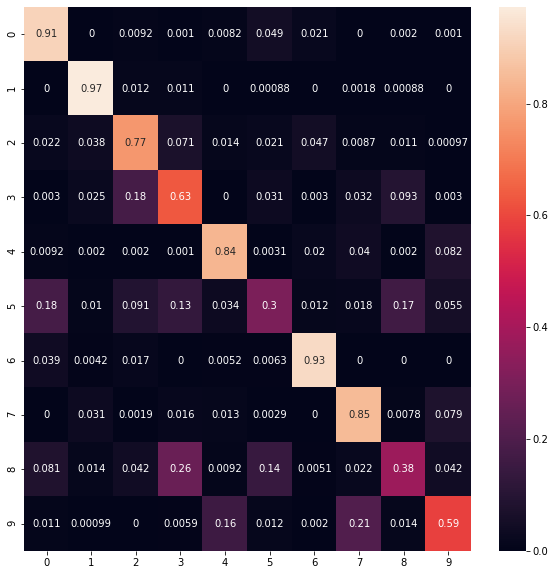

In [ ]:
NN.predict(norm_x_test,encoded_y_test)

In [ ]:
import numpy as np

In [ ]:
def piecewise_norm(vec,val,n):
    assert val > min(vec)
    
    return np.where(vec < val, n*(vec - min(vec))/(val - min(vec)), (1-n)*(vec - val)/(max(vec) - val) + n)

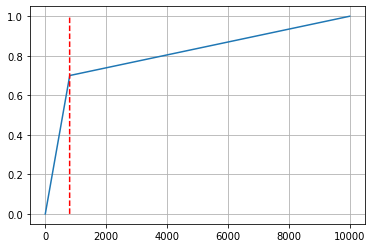

In [ ]:
x_ = np.arange(0,10000)

n = 0.7
cut = 800
x_norm = piecewise_norm(x_,cut,n)

plt.plot(x_,x_norm)
plt.plot(cut*np.ones(x_.shape[0]), x_norm,'r--')
plt.grid()